# Model to predict the engageability of message

##  OBJECTIVE :
To build a machine learning model to predict if the social media message is engageable or not for the customer service provider.

## Guidelines to tag message into a particular category

The twitter data after being extracted would be collected and each message would be tagged with one of the category below:
1) Followup : These are the reply given by a customer to the questions asked by the customer support like thank you, ok, sure,etc.

2) Care : These are the messages by the customer who are having some issues with the service or the product like I am not able to access this page in the online bank service.

3) Inquiry : These are the question asked by the customer about the product like what is the life type annual fee.

4) Compliment : These are the message where the customer is talking positively about the product or service like Cheers for the help.

5) Suggestion : These are the message where the customer is giving suggestion about some service or product to the company like Please add reset button on the registration page.

6) Leads : These are the messages where user have higher chances of being their new customer. Eg. what is the procedure to open a bank account in ABC bank

7) Detractor : These are messages which are talking vulgar about the product or service without any specific reason like f**k you, your company sucks.

8) Comparison : These are the message where the user is comparing companies which provide the same service or product. Eg. The internet banking service provided by XYZ bank is better than ABC bank.

9) BrandResponse : These are the reply given by customer service provider to the customer. Eg. Can i get your reference no.

10) Others : The messages which do not fall in other category will be put into others category. Eg. Donald Trump is talking about ABC bank.

## Data Preparation :

The 10 categories would be again divided into two:

1) Engageable : Care, Inquiry, Compliment, Suggestion, Leads, Comparison.

2) Non Engageable : Followup, Detractor, BrandResponse, Others. 

## Performance Metric :

For the given problem, we would give more importance to precision and recall value.

# 1. Data importing

In [4]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"rohitbohra2994","key":"b7947860e2ad40758c4dac7cbd51c8ff"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d bohraboxer/bgloablmodel
!ls

404 - Not Found
'kaggle (1).json'   kaggle.json   sample_data


In [3]:
!unzip bgloablmodel.zip 

unzip:  cannot find or open bgloablmodel.zip, bgloablmodel.zip.zip or bgloablmodel.zip.ZIP.


In [2]:
# importing the necessary packages 
import pandas as pd
import numpy as np

In [3]:
#importing the dataset as the data is in different file
cititraining=pd.read_csv("cititraining.csv")
hsbctraining=pd.read_csv("hsbctraining.csv")
jpmorgantraining1=pd.read_csv("jpmorgantraining1.csv")
wellsfargotraining1=pd.read_csv("wellsfargotraining1.csv")
wellsfargotraining2=pd.read_csv("wellsfargotraining2.csv")
hsbcvalidation=pd.read_csv("hsbcvalidation.csv")

In [4]:
#checking for the type of data
type(cititraining)

pandas.core.frame.DataFrame

##### The data collected for training is not in a particular dataset. The data is collected from 5 different files for training. The columns are not the same for all the datasets. We need to prepare the data in such a way that the columns are same for all the training dataset.

In [5]:
# viewing the data
cititraining[100:120]

,UMID,Message,Validation1,Validation2,Unnamed: 4
100,Citi_5531,What,Followup,NaN,4
101,Citi_5596,Yes.,Followup,NaN,4
102,Citi_9222,okay,Followup,NaN,4
103,Citi_9152,Said,NaN,NaN,4
104,Citi_9250,🇺🇸,NaN,NaN,4
105,Citi_8580,Thnx,Followup,NaN,4
106,Citi_10344,Crap,Detractors,NaN,4
107,Citi_11610,Si!!,NaN,NaN,4
108,Citi_11686,S wc,NaN,NaN,4
109,Citi_11695,Card,Others,NaN,4


In [6]:
hsbctraining[100:120]

,UMID,Message,Validation1,Validation2,Comment,length
100,HSBC_6089,test,Others,NaN,NaN,4
101,HSBC_6159,1137,Followup,NaN,NaN,4
102,HSBC_9201,Help,Care,NaN,NaN,4
103,HSBC_8888,سلام,NaN,NaN,NaN,4
104,HSBC_8885,No😭,Followup,NaN,NaN,4
105,HSBC_8320,1230,Followup,NaN,NaN,4
106,HSBC_8818,Hiii,NaN,NaN,NaN,4
107,HSBC_8767,Card,Followup,NaN,NaN,4
108,HSBC_9034,2470,Followup,NaN,NaN,4
109,HSBC_9166,الان,NaN,NaN,NaN,4


In [7]:
jpmorgantraining1[100:120]

,UMID,Message,Validation1,Validation2,Unnamed: 4
100,JPMorgan_139,Hello,Followup,NaN,5
101,JPMorgan_157,60402,Followup,NaN,5
102,JPMorgan_297,54.34,Followup,NaN,5
103,JPMorgan_361,34990,Followup,NaN,5
104,JPMorgan_376,95070,Followup,NaN,5
105,JPMorgan_487,Oh ok,Followup,NaN,5
106,JPMorgan_532,Liars,Followup,NaN,5
107,JPMorgan_545,10019,Followup,NaN,5
108,JPMorgan_562,20.61,Followup,NaN,5
109,JPMorgan_606,92065,Followup,NaN,5


In [8]:
wellsfargotraining1[100:120]

,UMID,Message,Validation1,Validation2,Comments,Unnamed: 5
100,wellsfargo_19292,Personal,Followup,NaN,NaN,8
101,wellsfargo_19933,TY Shaun,Followup,NaN,NaN,8
102,wellsfargo_20876,William?,Followup,NaN,NaN,8
103,wellsfargo_19880,ok thanx,Followup,NaN,NaN,8
104,wellsfargo_23640,W-9 form,Followup,NaN,NaN,8
105,wellsfargo_23965,question,NaN,NaN,NaN,8
106,wellsfargo_24004,Going on,Followup,NaN,NaN,8
107,wellsfargo_22583,Computer,Followup,NaN,NaN,8
108,wellsfargo_22559,PM sent!,Followup,NaN,NaN,8
109,wellsfargo_24454,Ball all,NaN,NaN,NaN,8


In [9]:
wellsfargotraining2[100:120]

,UMID,Message,Validation1,Validation2,Comments,length
100,wellsfargo_61,Thanks!,Followup,NaN,NaN,7
101,wellsfargo_65,KVALITO,NaN,NaN,NaN,7
102,wellsfargo_334,Before*,Followup,NaN,NaN,7
103,wellsfargo_446,Gracias,Followup,NaN,NaN,7
104,wellsfargo_633,Pension,Followup,NaN,NaN,7
105,wellsfargo_1435,Crooks!,Followup,NaN,NaN,7
106,wellsfargo_1901,Thank u,Followup,NaN,NaN,7
107,wellsfargo_2218,testing,Followup,NaN,NaN,7
108,wellsfargo_2536,Not sat,NaN,NaN,NaN,7
109,wellsfargo_3286,Balance,Others,NaN,NaN,7


In [10]:
cititraining.shape

(10835, 5)

In [11]:
hsbctraining.shape

(9440, 6)

In [12]:
jpmorgantraining1.shape

(15394, 5)

In [13]:
jpmorgantraining1.shape

(15394, 5)

In [14]:
wellsfargotraining2.shape

(11996, 6)

In [15]:
hsbcvalidation.shape

(2036, 9)

In [16]:
#training data

print("First dataset columns ",cititraining.columns.tolist())
print("Second dataset columns ",hsbctraining.columns.tolist())
print("Third dataset columns ",jpmorgantraining1.columns.tolist())
print("Fourth dataset columns ",jpmorgantraining1.columns.tolist())
print("Fifth dataset columns ",wellsfargotraining2.columns.tolist())
print("Fifth dataset columns ",hsbcvalidation.columns.tolist())


First dataset columns  ['UMID', 'Message', 'Validation1', 'Validation2', 'Unnamed: 4']
Second dataset columns  ['UMID', 'Message', 'Validation1', 'Validation2', 'Comment', 'length']
Third dataset columns  ['UMID', 'Message', 'Validation1', 'Validation2', 'Unnamed: 4']
Fourth dataset columns  ['UMID', 'Message', 'Validation1', 'Validation2', 'Unnamed: 4']
Fifth dataset columns  ['UMID', 'Message', 'Validation1', 'Validation2', 'Comments', 'length']
Fifth dataset columns  ['SocialNetwork', 'SenderScreenName', 'Message', 'CreatedTime', 'Permalink', 'Intuition Predicts', 'Message Type', 'Validation 1', 'Validation 2']


In [17]:
#data cleaning
#data = cititraining.drop('UMID','Validation2','Unnamed: 4',1)
columns = ['UMID','Validation2','Unnamed: 4']

data1 = cititraining.drop(columns, axis=1)
data1[10000:10020]

,Message,Validation1
10000,@Citi I referred one of my friend for citi cre...,Care
10001,Today was a very special day. Today was the 20...,NaN
10002,Some of employee of your bank called and colle...,Care
10003,Thanks a lot dear team Citibank India for choo...,Followup
10004,"Hi, I am Citi customer from India. I have one ...",Inquiry
10005,I have referred my friend Dhaval Rane for Rewa...,Care
10006,Hi again. I called and mostly everything was r...,Care
10007,@AskCiti I updated your horrible Android app &...,Care
10008,"Hi Mia, that&#39;s great thanks. I submitted a...",Followup
10009,i am writing because i have sent you several e...,Care


In [18]:
data1.Message[10000:10010]

10000    @Citi I referred one of my friend for citi cre...
10001    Today was a very special day. Today was the 20...
10002    Some of employee of your bank called and colle...
10003    Thanks a lot dear team Citibank India for choo...
10004    Hi, I am Citi customer from India. I have one ...
10005    I have referred my friend Dhaval Rane for Rewa...
10006    Hi again. I called and mostly everything was r...
10007    @AskCiti I updated your horrible Android app &...
10008    Hi Mia, that&#39;s great thanks. I submitted a...
10009    i am writing because i have sent you several e...
Name: Message, dtype: object

# 2. Understanding the Data

In [19]:
#Second dataset columns  ['UMID', 'Message', 'Validation1', 'Validation2', 'Comment', 'length']
columns = ['UMID','Validation2', 'Comment', 'length']

data2 = hsbctraining.drop(columns, axis=1)
data2[1200:1230]

,Message,Validation1
1200,Thanks have a nice day!,Followup
1201,Tatum Chynene Price😡😡,NaN
1202,Por favor me urge saber,NaN
1203,Hi. Is the system down?,Inquiry
1204,Lynlyn Paz - Ballesteros,NaN
1205,"hi, now i&#39;m in italy",Followup
1206,@MandSBank Ty email sent,Followup
1207,Alejandro Maldon Duña 🤓,NaN
1208,0545558995\n محمد الزبيدي,NaN
1209,on line site down again?,Care


In [20]:
#Third dataset columns  ['UMID', 'Message', 'Validation1', 'Validation2', 'Unnamed: 4']
columns = ['UMID','Validation2', 'Unnamed: 4']

data3 = jpmorgantraining1.drop(columns, axis=1)
data3[1000:1020]

,Message,Validation1
1000,Emily Whyte 06477,Followup
1001,Mark Snyder 89139,Followup
1002,Robb Lauzon 48360,Followup
1003,Alexa mollo 08816,Followup
1004,Bryan Smith 43611,Followup
1005,Try zipcode 60827,Followup
1006,It was for $43.12,Followup
1007,It's an iPhone 6s,Followup
1008,I found it its 3%,Followup
1009,Issac zakon 90036,Followup


In [21]:
#Fourth dataset columns  ['UMID', 'Message', 'Validation1', 'Validation2', 'Unnamed: 4']
columns = ['UMID','Validation2', 'Unnamed: 4']

data4 = jpmorgantraining1.drop(columns, axis=1)
data4[10000:10020]

,Message,Validation1
10000,@ChaseSupport Same issue trying to get resolve...,Care
10001,"@united Whatever you do, don't xfer your @Chas...",Care
10002,Hello! I am going to Mexico on Friday until We...,Suggestion
10003,@Chase ? - If someone signs a check over to me...,Inquiry
10004,Messaging you here because no one at either cl...,Care
10005,Hello if I currently hold an Chase Freedom cre...,Inquiry
10006,"Gotta love @Chase go paperless, can’t view sta...",Care
10007,Hi! I have an overdraft that I would like to h...,Care
10008,I called and spoke with someone and they said ...,Followup
10009,@Chase fraud protection is a #joke . I recomme...,Care


In [22]:
#Fifth dataset columns  ['UMID', 'Message', 'Validation1', 'Validation2', 'Comments', 'length']
columns = ['UMID','Validation2', 'Comments','length']

data5 = wellsfargotraining2.drop(columns, axis=1)
data5[1000:1020]

,Message,Validation1
1000,I need phone number Liz,Followup
1001,I’ll blast this forever,NaN
1002,@WellsFargo y'all weird,Detractor
1003,"Great, thank you Helen.",Followup
1004,Phone number 7865154067,Followup
1005,I am new to wells fargo,Others
1006,RT if @WellsFargo sucks,Detractor
1007,Hi... how are you doing,Followup
1008,Spokane Valley Wa 99216,Followup
1009,My number is 8042181751,Followup


In [23]:
columns = ['SocialNetwork','SenderScreenName', 'CreatedTime','Permalink','Intuition Predicts','Message Type','Validation 2']

data6 = hsbcvalidation.drop(columns, axis=1)
print("Before changing the column name",data6[:15])

# the data which is humanly tagged, the person has used words Compliment and Compliments. 
# we nned to correct the human error done.
# 8, 110, 126, 192, 713, 734, 755, 756, 801, 840, 889, 936, 954, 1001, 1039, 1056, 1057, 1077, 1330, 1952
print(data6[8:9]) #Brand Response
print(data6[110:111])#Compliment
print(data6[126:127])#Compliment
print(data6[192:193])#Compliment
print(data6[713:714])#Compliment
print(data6[734:735])#Compliment
print(data6[755:757])#Compliment
print(data6[801:802])#Compliment
print(data6[840:841])#Compliment
print(data6[889:890])#Compliment
print(data6[936:937])#Compliment
print(data6[1001:1002])#Compliment
print(data6[1039:1040])#Compliment
print(data6[1056:1057])#Compliment
print(data6[1077:1078])#Compliment
print(data6[1330:1331])#Compliment
print(data6[1952:1953])#Compliment


#renaming the column name from validation 1 to validation1
data6=data6.rename(index=str, columns={"Message": "Message", "Validation 1": "Validation1"})
print("After changing the column name",data6[:15])

Before changing the column name                                               Message    Validation 1
0   @HSBC (1) It takes 6 clicks to get to the logi...            Care
1                                          Shame on u            Care
2   Customer Service - Customer Service Officer in...          Others
3   @Uhalliru @futurKing @atenagap @renoomokri @Ga...          Others
4   @PremiumTimesng @ogundamisi @HSBC @MBuhari Apa...          Others
5   @Franeb @PaulUtho @ShehuSani @HSBC @GarShehu N...          Others
6   @GhenhisKhan @PaulUtho @ShehuSani @HSBC @GarSh...          Others
7   so apologies for the long tome but when I am g...          Others
8   Dear Mr. Pyers,\n\nThank you for your email da...  Brand Response
9   Finally  I emailed your regional customer serv...          Others
10  I also have an issue where I have some money i...            Care
11  @nathyemmanuel2 @PremiumTimesng @ogundamisi @H...          Others
12  @futurKing @inegbenoiseima2 @atenagap @renoomo...     

In [24]:
# Concatenating 5 dataset into a single training dataset
training=pd.concat([data1,data2,data3,data4,data5,data6])

In [25]:
training.shape

(65095, 2)

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.title('Training Data classes', fontsize=15)
sns.countplot(training.Validation1)
plt.xticks(rotation=90)
plt.show()

<Figure size 640x480 with 1 Axes>

In [27]:
(training.Message=='#ERROR!').count

<bound method Series.count of 0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2006    False
2007    False
2008    False
2009    False
2010    False
2011    False
2012    False
2013    False
2014    False
2015    False
2016    False
2017    False
2018    False
2019    False
2020    False
2021    False
2022    False
2023    False
2024    False
2025    False
2026    False
2027    False
2028    False
2029    False
2030    False
2031    False
2032    False
2033    False
2034    False
2035    False
Name: Message, Length: 65095, dtype: bool>

In [28]:
training.describe(include='all')

,Message,Validation1
count,65095,61807
unique,49404,14
top,HSBC Hong Kong is a terrible business bank. F...,Followup
freq,15,25735


In [29]:
training[11988:12000]

,Message,Validation1
1153,Yo kiero uno de credito,NaN
1154,https://t.co/eGd1NeAuIJ,NaN
1155,即係credit card入數去pay me?,NaN
1156,Follow up my aplication,Followup
1157,Thank you so much sir..,Followup
1158,https://t.co/4Ci6QiTIm5,NaN
1159,Shina Lou Gargar Hilado,Followup
1160,When will they call....,Followup
1161,"HSBC Sent, please check",Followup
1162,https://t.co/Z1Uf7qIxvI,NaN


In [30]:
training['Validation1'].value_counts()

Followup          25735
Care              22164
Inquiry            7783
Others             3460
Compliments        1116
Suggestion          452
BrandResponse       294
Leads               286
Detractor           282
Detractors          173
Comparison           40
Compliment           19
Comparision           2
Brand Response        1
Name: Validation1, dtype: int64

In [31]:
# data with validation being NaN
training[0:12]

,Message,Validation1
0,?,NaN
1,3,NaN
2,B,NaN
3,Y,NaN
4,.,NaN
5,",",NaN
6,O,NaN
7,U,NaN
8,^,NaN
9,8,NaN


# 3. Data Preparation

In [32]:
#removing the row with NaN values
training = training.dropna()     

In [33]:
# The category assigned with a number. If the number is lesser than 7, then the message is categorised into Engageable
# else the message is Non-Engageable
training['Validation1']=training.Validation1.map({
    'Care': 1,
    'Inquiry': 2,
    'Compliments':3,
    'Compliment ':4,
    'Suggestion':5,
    'Leads':6,
    'Followup':7,
    'Others':8,
    'BrandResponse':9,
    'Brand Response':10,
    'Detractor':11,
    'Detractors':12,
    'Comparison':13,
    'Comparision':14
})

In [34]:
training.head()

,Message,Validation1
13,Hi,8
14,Ok,7
15,No,7
18,Ya,7
23,Pm,7


In [35]:
# function to categorise data into engegable and non engageable data
def engageability(i):
    if i < 7:
        return 1
    else:
        return 0

actualScore = training['Validation1']
engage = actualScore.map(engageability) 
training['Engage'] = engage
print("Number of data points in our data", training.shape)

Number of data points in our data (61807, 3)


In [36]:
# count of Engageable and Non-Engageble
training['Engage'].value_counts()

1    31820
0    29987
Name: Engage, dtype: int64

In [37]:
training[12050:12070]

,Message,Validation1,Engage
3059,hi i applied in the link that you have send to...,2,1
3060,@HSBC_UK Hi how long does it take to open a bu...,2,1
3061,"@HSBC_UK hello, is this an hsbc number? 034534...",2,1
3062,@HSBC_UK is it normal this length of time to o...,7,0
3063,Im gonna asked you sir if this is really you w...,7,0
3064,@HSBC_US But they don't answer the phone or re...,7,0
3065,"Well done all of you ,a great thing to do.god ...",7,0
3066,Hopefully i will get HSBC credit card with ann...,8,0
3067,@firstdirecthelp Please make it available betw...,7,0
3068,@HSBC_IN Can you please provide me with the cu...,2,1


In [38]:
#data cleaning
#Deduplication of entries
training=training.drop_duplicates(subset={"Message"}, keep='first', inplace=False)
training.shape

(46527, 3)

In [39]:
# Class count of each class
training['Engage'].value_counts()

1    23912
0    22615
Name: Engage, dtype: int64

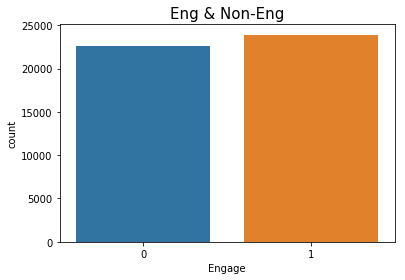

In [40]:
plt.title('Eng & Non-Eng', fontsize=15)
sns.countplot(training.Engage)
plt.xticks()
plt.show()

# 4. Data Cleaning

In [41]:
#Data Cleaning Stage. Clean each review from the sampled Amazon Dataset
import nltk
from nltk.corpus import stopwords

#Function to clean html tags from a sentence
def removeHtml(sentence): 
    pattern = re.compile('<.*?>')
    cleaned_text = re.sub(pattern,' ',sentence)
    return cleaned_text

#Function to keep only words containing letters A-Z and a-z. This will remove all punctuations, special characters etc.
def removePunctuations(sentence):
    cleaned_text  = re.sub('[^a-zA-Z]',' ',sentence)
    return cleaned_text

#Stemming and stopwords removal
import re
from nltk.stem.snowball import SnowballStemmer
sno = SnowballStemmer(language='english')

#Removing the word 'not' from stopwords
default_stopwords = set(stopwords.words('english'))
remove_not = set(['not'])
custom_stopwords = default_stopwords - remove_not

#Building a data corpus by removing all stopwords except 'not'. Because 'not' can be an important estimator to differentiate between positive and negative reviews.    
count=0                   #Iterator to iterate through the list of reviews and check if a given review belongs to the positive or negative class
string=' '    
data_corpus=[]
engage_words=[] #Store all the relevant words from engageable reviews
non_engage_words=[] #Store all the relevant words from Non engageable reviews 
stemed_word=''


for review in training['Message'].values:
    filtered_sentence=[]
    sentence=removeHtml(review) #Remove HTMl tags
    for word in sentence.split():
        for cleaned_words in removePunctuations(word).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)): #Checking if a word consists of only alphabets + word length is greater than 2.    
                if(cleaned_words.lower() not in custom_stopwords):
                    stemed_word=(sno.stem(cleaned_words.lower()))
                    filtered_sentence.append(stemed_word)
                    if (training['Engage'].values)[count] == 1: 
                        engage_words.append(stemed_word) #List of all the relevant words from Positive reviews
                    if(training['Engage'].values)[count] == 0:
                        non_engage_words.append(stemed_word) #List of all the relevant words from Negative reviews
    
                else:
                    continue
            else:
                continue 
    string = " ".join(filtered_sentence) #Final string of cleaned words    
    data_corpus.append(string) #Data corpus contaning cleaned reviews from the whole dataset
    count+=1
    

print("The length of the data corpus is : {}".format(len(data_corpus)))

#Building a data corpus by removing only the Punctuations and HTML tags. Stopwords are preserved. Words are not stemmed. This is useful for Average Word2Vec, TF-IDF W2V.
string=' '    
not_stemmed_corpus=[]
for review in training['Message'].values:
    filtered_sentence=[]
    sentence=removeHtml(review) #Remove HTMl tags
    for word in sentence.split():
        for cleaned_words in removePunctuations(word).split():
            if(cleaned_words.isalpha()): #Checking if a word consists of only alphabets    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    string = " ".join(filtered_sentence)    
    not_stemmed_corpus.append(string) 
    
#Adding a column of CleanedText to the table final which stores the data_corpus after pre-processing the reviews 
training['CleanedText']=data_corpus 

#Adding a column of PreserveStopwords to the table final which stores the data corpus in which stopwords are preserved and words are not stemmed.  
training['PreserveStopwords']=not_stemmed_corpus 

print("Printing the number of Engageable and Non Engageable reviews after data cleaning.")
print(training['Engage'].value_counts())

# Finding most frequently occuring Positive and Negative words 
Engage_1=nltk.FreqDist(engage_words)
Engage_0=nltk.FreqDist(non_engage_words)


print("Most Common words in engageable messages : ",Engage_1.most_common(25))
print("Most Common words in non-engageable messages : ",Engage_0.most_common(25))


#Display the first 10 rows of the sampled_dataset.
print("\nFirst 10 rows of the sampled_dataset.")
training.head(10)

The length of the data corpus is : 46527
Printing the number of Engageable and Non Engageable reviews after data cleaning.
1    23912
0    22615
Name: Engage, dtype: int64
Most Common words in engageable messages :  [('account', 8542), ('card', 7436), ('bank', 5789), ('not', 5610), ('chase', 4821), ('get', 4318), ('call', 3648), ('hsbc', 3614), ('credit', 3425), ('custom', 3120), ('well', 2976), ('money', 2775), ('help', 2772), ('time', 2660), ('need', 2590), ('wellsfargo', 2545), ('servic', 2449), ('check', 2404), ('fargo', 2397), ('tri', 2381), ('would', 2349), ('use', 2274), ('thank', 2261), ('pleas', 2065), ('charg', 2054)]
Most Common words in non-engageable messages :  [('thank', 4416), ('hsbc', 3156), ('not', 2596), ('account', 2476), ('call', 2235), ('card', 1876), ('bank', 1479), ('help', 1413), ('get', 1384), ('https', 1350), ('number', 1299), ('pleas', 1224), ('time', 1222), ('well', 1127), ('chase', 1121), ('need', 1093), ('would', 1060), ('know', 950), ('phone', 918), ('cr

,Message,Validation1,Engage,CleanedText,PreserveStopwords
13,Hi,8,0,,hi
14,Ok,7,0,,ok
15,No,7,0,,no
18,Ya,7,0,,ya
23,Pm,7,0,,pm
44,So,8,0,,so
45,Thx,7,0,thx,thx
46,For,7,0,,for
49,Hey,8,0,hey,hey
50,Bye,8,0,bye,bye


In [42]:
training[100:150]

,Message,Validation1,Engage,CleanedText,PreserveStopwords
220,website,8,0,websit,website
225,awesome,3,1,awesom,awesome
226,Hope so,7,0,hope,hope so
228,B-smart,7,0,smart,b smart
229,Hai sir,8,0,hai sir,hai sir
231,To gold,7,0,gold,to gold
234,Intrstd,7,0,intrstd,intrstd
236,"India ,",7,0,india,india
238,Teleton,7,0,teleton,teleton
239,4000 ok,7,0,,ok


In [43]:
null_columns=training.columns[training.isnull().any()]
print(training[training["Engage"].isnull()][null_columns])

Empty DataFrame
Columns: []
Index: []


In [44]:
training['Engage'].value_counts()

1    23912
0    22615
Name: Engage, dtype: int64

In [48]:
import pandas as pd
training.to_pickle('training.pkl')    #to save the dataframe, df to 123.pkl
#df1 = pd.read_pickle('123.pkl') #to load 123.pkl back to the dataframe df

In [49]:
training.CleanedText.str.split(expand=True).stack().value_counts()

account            11018
card                9312
not                 8206
bank                7268
hsbc                6770
thank               6677
chase               5942
call                5883
get                 5702
credit              4294
help                4185
well                4103
time                3882
custom              3718
need                3683
money               3478
would               3409
wellsfargo          3301
pleas               3289
check               3259
tri                 3219
number              3185
fargo               3183
use                 3003
servic              2990
one                 2905
know                2742
day                 2729
https               2716
phone               2690
                   ...  
atrbfiown              1
fleet                  1
posa                   1
udad                   1
opitz                  1
bmd                    1
chatter                1
nmd                    1
efulefus               1


In [50]:
training.PreserveStopwords.str.split(expand=True).stack().value_counts()

i               53054
to              38526
the             34297
my              24634
a               24240
and             23908
you             17148
is              15924
it              15127
for             14333
in              12879
t               12094
have            11752
that            11107
of              10771
me              10685
on               9912
account          9897
with             9124
this             8882
can              8746
card             8531
was              8464
not              8204
your             7196
hsbc             6770
but              6356
be               6119
s                6031
chase            5921
                ...  
ephrata             1
activitys           1
thlpnpz             1
adair               1
inflicted           1
kdylg               1
attendees           1
fashionnova         1
gettinv             1
ghls                1
hsbcjokers          1
youdabest           1
mep                 1
nomso               1
recapturin

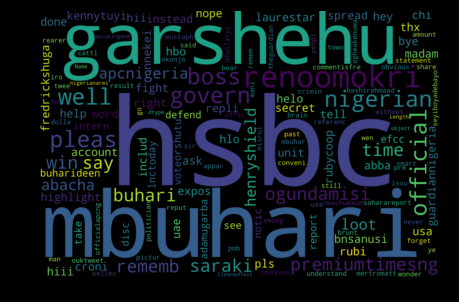

In [51]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = training.CleanedText

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (8, 4),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

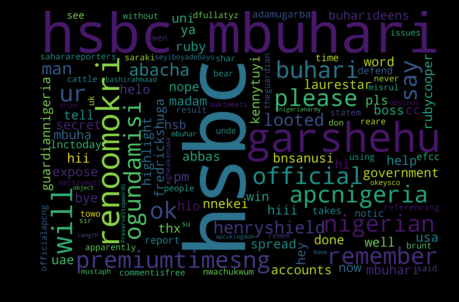

In [52]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = training.PreserveStopwords

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (8, 4),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [53]:
columns = ['Message','Validation1','PreserveStopwords']

train_no_stop_word = training.drop(columns, axis=1)
print("Before NaN conversion \n",train_no_stop_word[:5])

#changing CleanedText row which containg only space to NaN value
train_no_stop_word['CleanedText'].replace('', np.nan, inplace=True)
print("After NaN conversion \n",train_no_stop_word[:5])

# dropping NaN values
train_no_stop_word.dropna(subset=['CleanedText'], inplace=True)
print("Removing NaN value",train_no_stop_word[:10])

Before NaN conversion 
     Engage CleanedText
13       0            
14       0            
15       0            
18       0            
23       0            
After NaN conversion 
     Engage CleanedText
13       0         NaN
14       0         NaN
15       0         NaN
18       0         NaN
23       0         NaN
Removing NaN value     Engage CleanedText
45       0         thx
49       0         hey
50       0         bye
51       0         uae
52       0         usa
53       0         hlo
56       0         hii
68       0         pls
77       0        helo
78       1        help


In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split


x=train_no_stop_word['CleanedText']
y=train_no_stop_word['Engage']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 34)

In [55]:
print("x_train shape : ",x_train.shape)
print("y_train shape : ",y_train.shape)
print("x_test shape : ",x_test.shape)
print("y_test shape : ",y_test.shape)

x_train shape :  (36296,)
y_train shape :  (36296,)
x_test shape :  (9074,)
y_test shape :  (9074,)


# 4. Building a model

### The data is featurised with different featurization technique i.e Bag Of Words and TF-IDF and then different classification algorithms are used.

## 1) LOGISTIC REGRESSION 

In [209]:
# converting the text data into numbers using BOW featurization. 
# this process is done for both train and test data
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing

count_vect = CountVectorizer() 

x_train = count_vect.fit_transform(x_train)
x_test = count_vect.transform(x_test)


#Normalize train and test data
x_train = preprocessing.normalize(x_train)
print("Train Data Size: ",x_train.shape)
x_test = preprocessing.normalize(x_test)
print("Test Data Size: ",x_test.shape)


Train Data Size:  (36296, 23589)
Test Data Size:  (9074, 23589)


In [210]:
# using logistic regression to build a classification model witth hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


clf = LogisticRegression()
#params we need to try on classifier
param_grid = {'C':[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001],
             'penalty':['l1','l2']} 
gsv = GridSearchCV(clf,param_grid,cv=10,verbose=1, n_jobs=-1,scoring='precision')
gsv.fit(x_train,y_train)
print("The best HyperParameter: ",gsv.best_params_)
print("The best Accuracy: %.2f%%"%(gsv.best_score_*100))

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 10.3min finished


The best HyperParameter:  {'C': 5, 'penalty': 'l2'}
The best Accuracy: 78.73%


In [64]:
# This function plots the confusion, precision and recall matrices
def plot_confusion_matrix(x_test, y_pred):
    C = confusion_matrix(x_test, y_pred)
    
    A =(((C.T)/(C.sum(axis=1))).T)
   
    B =(C/C.sum(axis=0))
 
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Accuracy on test set: 79.678%
Precision on test set: 0.780
Recall on test set: 0.851
F1-micro-Score on test set: 0.797


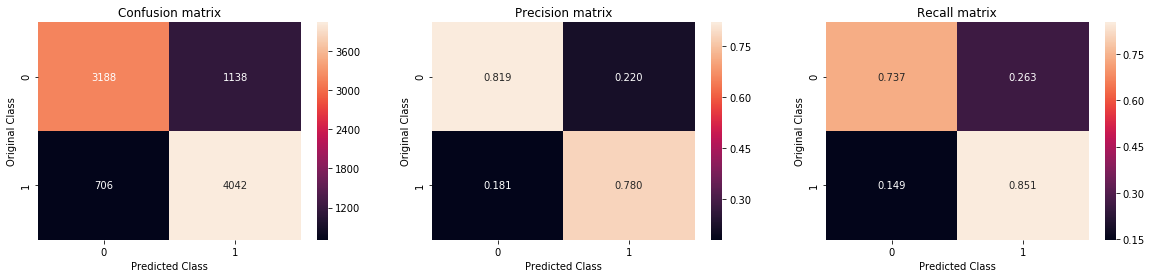

In [214]:
#Testing thew performance of model on Test data
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns


clf = LogisticRegression(C= 5, penalty= 'l2')
clf.fit(x_train,y_train)
pred = clf.predict(x_test)

print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, pred)))
print("Recall on test set: %0.3f"%(recall_score(y_test, pred)))
print("F1-micro-Score on test set: %0.3f"%(f1_score(y_test, pred,average='micro')))
plot_confusion_matrix(y_test, pred)


#### As the recall value for Class 0 and Class 1 is high, the model performs well for recall but the precison value for Class 1 is very poor.

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 34)

In [216]:
# Using Bag of Words featurization and ngram=2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing

count_vect = CountVectorizer(min_df=2,ngram_range=(1,2)) 

x_train = count_vect.fit_transform(x_train)
x_test = count_vect.transform(x_test)


#Normalize train and test data
x_train = preprocessing.normalize(x_train)
print("Train Data Size: ",x_train.shape)
x_test = preprocessing.normalize(x_test)
print("Test Data Size: ",x_test.shape)


Train Data Size:  (36296, 56909)
Test Data Size:  (9074, 56909)


In [217]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


clf = LogisticRegression()
#params we need to try on classifier
param_grid = {'C':[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001],
             'penalty':['l1','l2']} 
gsv = GridSearchCV(clf,param_grid,cv=10,verbose=1, n_jobs=-1,scoring='precision')
gsv.fit(x_train,y_train)
print("The best HyperParameter: ",gsv.best_params_)
print("The best Accuracy: %.2f%%"%(gsv.best_score_*100))

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.0min finished


The best HyperParameter:  {'C': 5, 'penalty': 'l2'}
The best Accuracy: 79.10%


Accuracy on test set: 79.678%
Precision on test set: 0.780
Recall on test set: 0.851
F1-micro-Score on test set: 0.797


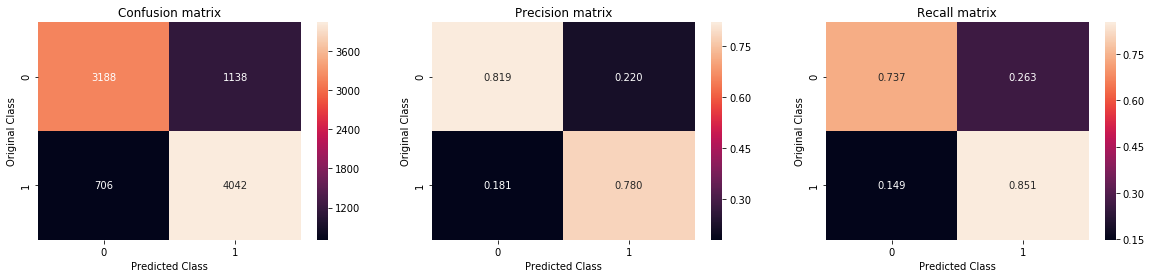

In [218]:
#Testing Accuracy on Test data
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns


clf = LogisticRegression(C= 5, penalty= 'l2')
clf.fit(x_train,y_train)
pred = clf.predict(x_test)

print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, pred)))
print("Recall on test set: %0.3f"%(recall_score(y_test, pred)))
print("F1-micro-Score on test set: %0.3f"%(f1_score(y_test, pred,average='micro')))
plot_confusion_matrix(y_test, pred)

### The model performs well for recall of Class 0 and average for Class 1. The precison is poor for class 1.

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 34)

In [232]:
# BOW featurization with ngram=4 and min_df=2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing

count_vect = CountVectorizer(min_df=2,ngram_range=(1,4)) 

x_train = count_vect.fit_transform(x_train)
x_test = count_vect.transform(x_test)


#Normalize train and test data
x_train = preprocessing.normalize(x_train)
print("Train Data Size: ",x_train.shape)
x_test = preprocessing.normalize(x_test)
print("Test Data Size: ",x_test.shape)



Train Data Size:  (36296, 79329)
Test Data Size:  (9074, 79329)


In [233]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


clf = LogisticRegression()
#params we need to try on classifier
param_grid = {'C':[1000,500,100,50,10,5,4,3,2,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001],
             'penalty':['l1','l2']} 
gsv = GridSearchCV(clf,param_grid,cv=10,verbose=1, n_jobs=-1,scoring='precision')
gsv.fit(x_train,y_train)
print("The best HyperParameter: ",gsv.best_params_)
print("The best Accuracy: %.2f%%"%(gsv.best_score_*100))

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  6.1min finished


The best HyperParameter:  {'C': 5, 'penalty': 'l2'}
The best Accuracy: 78.88%


Accuracy on test set: 79.557%
Precision on test set: 0.776
Recall on test set: 0.856
F1-micro-Score on test set: 0.796


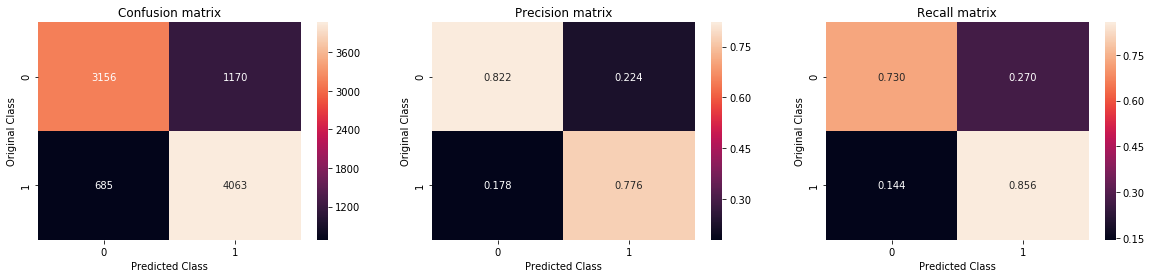

In [234]:
#Testing Accuracy on Test data
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns


clf = LogisticRegression(C= 5, penalty= 'l2')
clf.fit(x_train,y_train)
pred = clf.predict(x_test)

print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, pred)))
print("Recall on test set: %0.3f"%(recall_score(y_test, pred)))
print("F1-micro-Score on test set: %0.3f"%(f1_score(y_test, pred,average='micro')))
plot_confusion_matrix(y_test, pred)

### The model is similar to the previous models, where  recall is performing average but works poor for precision.

In [0]:
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2,random_state = 34)

In [237]:
# TF-IDF featurization with ngram=4, max_features=2000
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(1,4), max_features=4000, min_df=10) #Using bi-grams
x_train = tfidf.fit_transform(x_train)
#Normalize Data
x_train = preprocessing.normalize(x_train)
print("Train Data Size: ",x_train.shape)
x_test = tfidf.transform(x_test)
#Normalize Data
x_test = preprocessing.normalize(x_test)
print("Test Data Size: ",x_test.shape)

Train Data Size:  (36296, 4000)
Test Data Size:  (9074, 4000)


In [238]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


clf = LogisticRegression()
#params we need to try on classifier
param_grid = {'C':[1000,500,100,50,10,5,4,3,2,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001],
             'penalty':['l1','l2']} 
gsv = GridSearchCV(clf,param_grid,cv=10,verbose=1, n_jobs=-1,scoring='precision')
gsv.fit(x_train,y_train)
print("The best HyperParameter: ",gsv.best_params_)
print("The best Accuracy: %.2f%%"%(gsv.best_score_*100))

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  2.2min finished


The best HyperParameter:  {'C': 2, 'penalty': 'l2'}
The best Accuracy: 78.75%


Accuracy on test set: 79.359%
Precision on test set: 0.779
Recall on test set: 0.845
F1-micro-Score on test set: 0.794


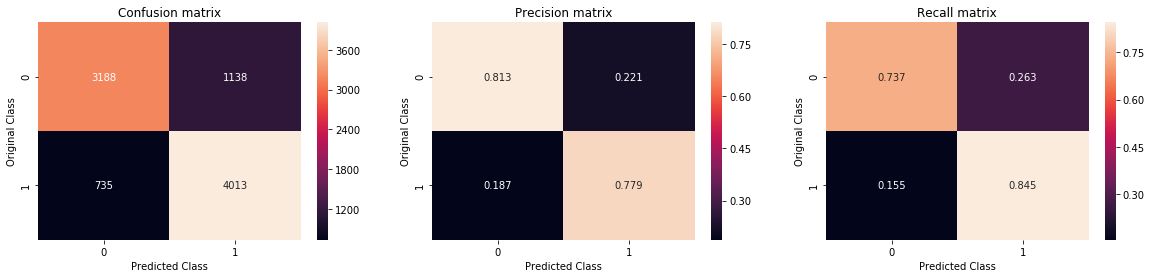

In [239]:
clf = LogisticRegression(C= 2, penalty= 'l2')
clf.fit(x_train,y_train)
pred = clf.predict(x_test)

print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, pred)))
print("Recall on test set: %0.3f"%(recall_score(y_test, pred)))
print("F1-micro-Score on test set: %0.3f"%(f1_score(y_test, pred,average='micro')))
plot_confusion_matrix(y_test, pred)

### The model is similar to the previous models, where  recall is performing average but works poor for precision.

## 2. DECISION TREE 

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 34)

In [0]:
#Bag of words with ngram=1, max_features =4000 and min_df=5
count_vect = CountVectorizer(max_features=4000, min_df=5) 
x_train = count_vect.fit_transform(x_train)
x_test = count_vect.transform(x_test)


In [245]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

depth=[1,5,10,20,50,100,150,200,250,300,350,400,450,500,1000]
min_split=[5,10,20,50,100,150,200,250,300,350,400,450,500,1000]
clf = DecisionTreeClassifier()
param_grid = {'max_depth': depth,'min_samples_split': min_split}

gsv = GridSearchCV (clf,param_grid,cv=10,verbose=1,scoring='precision',n_jobs=-1)
gsv.fit(x_train,y_train)
cv_scores = gsv.cv_results_['mean_test_score']

print("The best hyperparameter is : ",gsv.best_params_)
print("The best accuracy is : %.2f%%"%(gsv.best_score_*100))

Fitting 10 folds for each of 210 candidates, totalling 2100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 172 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 421 tasks      | elapsed:   53.3s
[Parallel(n_jobs=-1)]: Done 671 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 1021 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-1)]: Done 1471 tasks      | elapsed: 35.0min
[Parallel(n_jobs=-1)]: Done 2021 tasks      | elapsed: 56.8min


The best hyperparameter is :  {'max_depth': 1, 'min_samples_split': 5}
The best accuracy is : 75.95%


[Parallel(n_jobs=-1)]: Done 2100 out of 2100 | elapsed: 58.9min finished


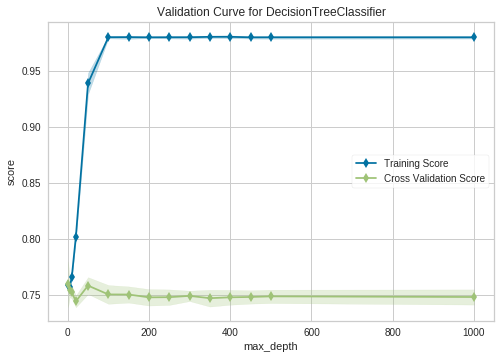

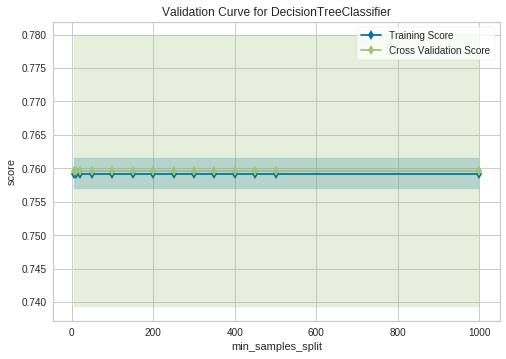

In [246]:
from yellowbrick.model_selection import ValidationCurve
#Validation Curve
viz = ValidationCurve(gsv.best_estimator_, param_name="max_depth",param_range=depth, cv=10, scoring="precision")
viz.fit(x_train, y_train)
viz.poof()
viz = ValidationCurve(gsv.best_estimator_, param_name="min_samples_split",param_range=min_split, cv=10, scoring="precision")
viz.fit(x_train, y_train)
viz.poof()

Accuracy on test set: 56.028%
Precision on test set: 0.740
Recall on test set: 0.246
F1-Score on test set: 0.370


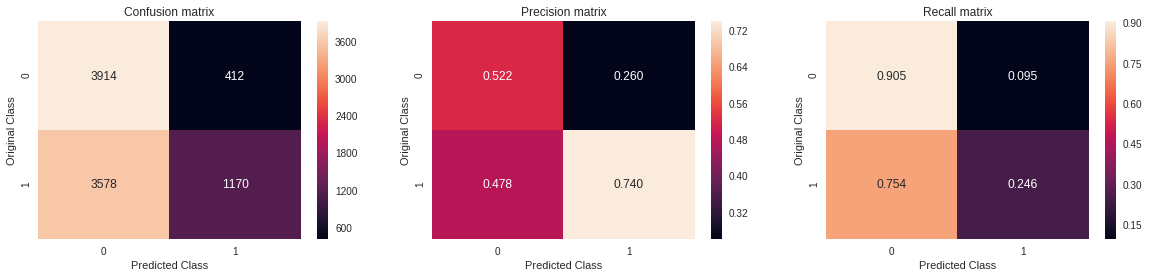

In [247]:
clf = DecisionTreeClassifier(max_depth= 1, min_samples_split= 5)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
y_prob = clf.predict_proba(x_test)


print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred)))
plot_confusion_matrix(y_test, y_pred)

### The model works average for recall in Class 1 and very good for Class 0, but the precison is low for Class 1

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 34)

In [0]:
#Bag of words with ngram=3, max_features=5000 and min_df=20
count_vect = CountVectorizer(max_features=5000, min_df=20,ngram_range=(1,3)) 
x_train = count_vect.fit_transform(x_train)
x_test = count_vect.transform(x_test)

In [250]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

depth=[1,5,10,20,50,100,150,200,250,300,350,400,450,500,1000]
min_split=[100,200,400,500,1000,1200,1500]
clf = DecisionTreeClassifier()
param_grid = {'max_depth': depth,'min_samples_split': min_split}

gsv = GridSearchCV (clf,param_grid,cv=10,verbose=1,scoring='precision',n_jobs=-1)
gsv.fit(x_train,y_train)
cv_scores = gsv.cv_results_['mean_test_score']

print("The best hyperparameter is : ",gsv.best_params_)
print("The best accuracy is : %.2f%%"%(gsv.best_score_*100))

Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:   57.8s
[Parallel(n_jobs=-1)]: Done 518 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 868 tasks      | elapsed: 14.9min


The best hyperparameter is :  {'max_depth': 1, 'min_samples_split': 100}
The best accuracy is : 75.95%


[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed: 19.2min finished


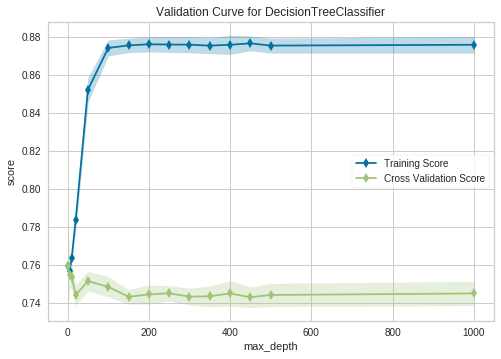

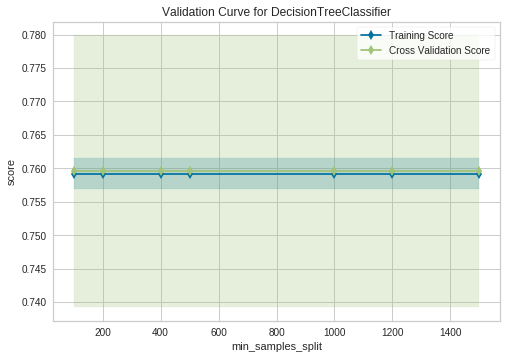

In [251]:
from yellowbrick.model_selection import ValidationCurve
#Validation Curve
viz = ValidationCurve(gsv.best_estimator_, param_name="max_depth",param_range=depth, cv=10, scoring="precision")
viz.fit(x_train, y_train)
viz.poof()
viz = ValidationCurve(gsv.best_estimator_, param_name="min_samples_split",param_range=min_split, cv=10, scoring="precision")
viz.fit(x_train, y_train)
viz.poof()

Accuracy on test set: 56.028%
Precision on test set: 0.740
Recall on test set: 0.246
F1-Score on test set: 0.370


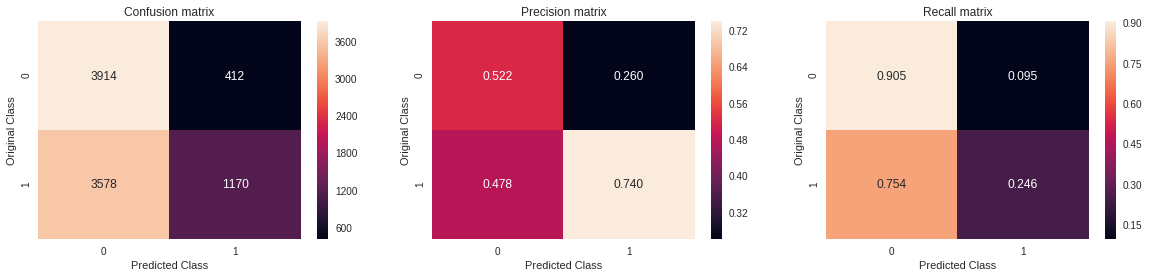

In [253]:
clf = DecisionTreeClassifier(max_depth= 1, min_samples_split= 100)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
y_prob = clf.predict_proba(x_test)


print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred)))
plot_confusion_matrix(y_test, y_pred)

### The model works average for recall in Class 1 and very good for Class 0, but the precison is low for Class 1

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 34)

In [255]:
# TF-IDF feturization with ngram=4, max_features=2000 and min_df=10
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(1,4), max_features=2000, min_df=10) #Using bi-grams
x_train = tfidf.fit_transform(x_train)
#Normalize Data
x_train = preprocessing.normalize(x_train)
print("Train Data Size: ",x_train.shape)
x_test = tfidf.transform(x_test)
#Normalize Data
x_test = preprocessing.normalize(x_test)
print("Test Data Size: ",x_test.shape)

Train Data Size:  (36296, 2000)
Test Data Size:  (9074, 2000)


In [256]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

depth=[20,50,100,150,200,250,300,350,400,450,500,1000]
min_split=[500,1000,1200,1500,1700,2000]
clf = DecisionTreeClassifier()
param_grid = {'max_depth': depth,'min_samples_split': min_split}

gsv = GridSearchCV (clf,param_grid,cv=10,verbose=1,scoring='precision',n_jobs=-1)
gsv.fit(x_train,y_train)
cv_scores = gsv.cv_results_['mean_test_score']

print("The best hyperparameter is : ",gsv.best_params_)
print("The best accuracy is : %.2f%%"%(gsv.best_score_*100))

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 17.9min finished


The best hyperparameter is :  {'max_depth': 20, 'min_samples_split': 500}
The best accuracy is : 74.20%


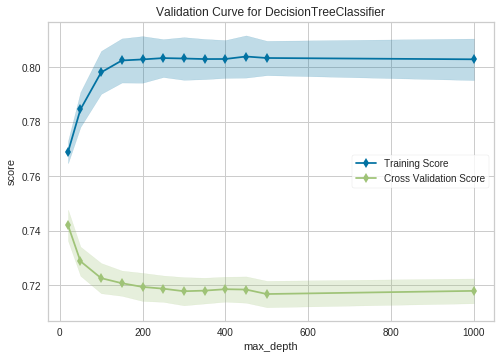

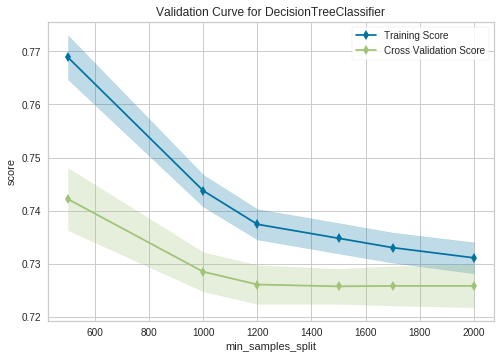

In [257]:
from yellowbrick.model_selection import ValidationCurve
#Validation Curve
viz = ValidationCurve(gsv.best_estimator_, param_name="max_depth",param_range=depth, cv=10, scoring="precision")
viz.fit(x_train, y_train)
viz.poof()
viz = ValidationCurve(gsv.best_estimator_, param_name="min_samples_split",param_range=min_split, cv=10, scoring="precision")
viz.fit(x_train, y_train)
viz.poof()

Accuracy on test set: 74.488%
Precision on test set: 0.734
Recall on test set: 0.803
F1-Score on test set: 0.767


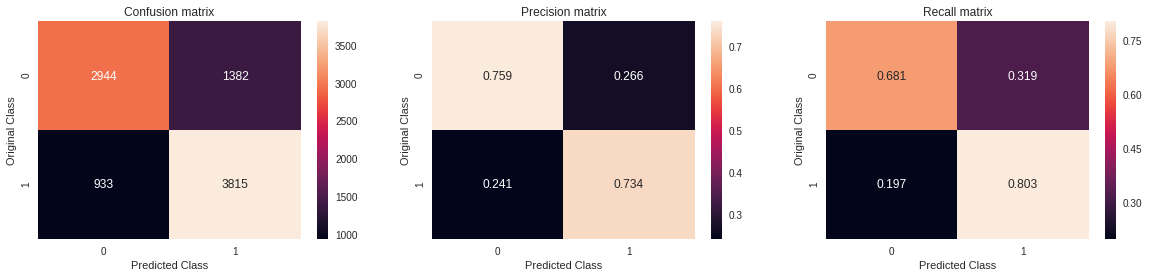

In [258]:
clf = DecisionTreeClassifier(max_depth= 20, min_samples_split= 500)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
y_prob = clf.predict_proba(x_test)


print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred)))
plot_confusion_matrix(y_test, y_pred)

### The model works good for recall in both Class 1 and Class 0, but the precison is low for Class 1

## 3) Naive Bayes 

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 34)

In [260]:
# TF-IDF featurization with ngram=1
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
x_train = tfidf.fit_transform(x_train)
#Normalize Data
x_train = preprocessing.normalize(x_train)
print("Train Data Size: ",x_train.shape)
x_test = tfidf.transform(x_test)
#Normalize Data
x_test = preprocessing.normalize(x_test)
print("Test Data Size: ",x_test.shape)

Train Data Size:  (36296, 23589)
Test Data Size:  (9074, 23589)


In [0]:
def find_optimal_k_multi(X_train,y_train, myList):
   
    # empty list that will hold cv scores
    cv_scores = []

    # split the train data set into cross validation train and cross validation test
    X_tr, X_cv, y_tr, y_cv = train_test_split(X_train, y_train, test_size=0.3)

    for i in myList:
        nb = MultinomialNB(alpha = i)
        model = nb.fit(X_tr, y_tr)

        # predict the response on the crossvalidation train
        pred = model.predict(X_cv)

        # evaluate CV accuracy
        acc = f1_score(y_cv, pred)
        cv_scores.append(acc)
        
    # changing to misclassification error
    MSE = [x for x in cv_scores]

    # determining best alpha
    optimal_alpha = myList[MSE.index(max(MSE))]
    print('\nThe optimal alpha is ', optimal_alpha)


    plt.figure(figsize=(10,6))
    plt.plot(myList,MSE,color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. alpha Value')
    plt.xlabel('alpha')
    plt.ylabel('Error Rate')

    print("the misclassification error for each k value is : ", np.round(MSE,3))
    
    return optimal_alpha


The optimal alpha is  1
the misclassification error for each k value is :  [0.69  0.7   0.706 0.719 0.727 0.755 0.768 0.787 0.786 0.774 0.77  0.763
 0.761 0.759 0.758 0.757 0.757]
1


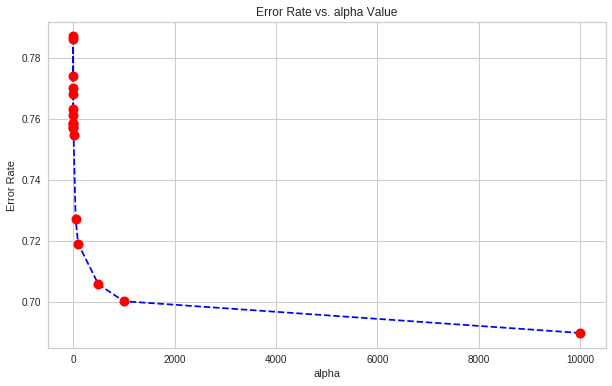

In [262]:
from sklearn.naive_bayes import MultinomialNB

alpha = 10000,1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001,0.00001
optimal_alpha = find_optimal_k_multi(x_train ,y_train,alpha)

print(optimal_alpha)

Accuracy on test set: 71.732%
Precision on test set: 0.658
Recall on test set: 0.958
F1-micro-Score on test set: 0.717


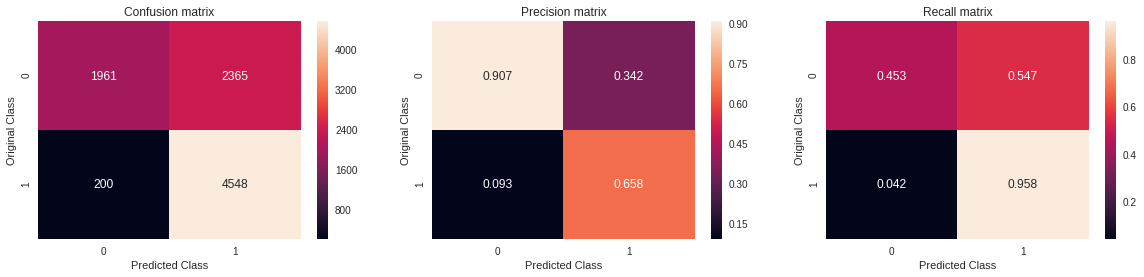

In [263]:
# instantiate learning model k = optimal_k
mn = MultinomialNB(alpha = optimal_alpha)
model = mn.fit(x_train, y_train)


# predict the response
pred = mn.predict(x_test)

print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, pred)))
print("Recall on test set: %0.3f"%(recall_score(y_test, pred)))
print("F1-micro-Score on test set: %0.3f"%(f1_score(y_test, pred,average='micro')))
plot_confusion_matrix(y_test, pred)

## The model for recall works well for Class 1 but poorly for Class 0 and very poor for precision of Class 1

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 34)

In [0]:
#Bag of words with  ngram=5000, min_df=20 and max_features=5000
count_vect = CountVectorizer(max_features=5000, min_df=20,ngram_range=(1,3)) 
x_train = count_vect.fit_transform(x_train)
x_test = count_vect.transform(x_test)


The optimal alpha is  10
the misclassification error for each k value is :  [0.691 0.715 0.721 0.751 0.763 0.765 0.762 0.762 0.762 0.763 0.763 0.763
 0.763 0.763 0.763 0.763 0.763]
10


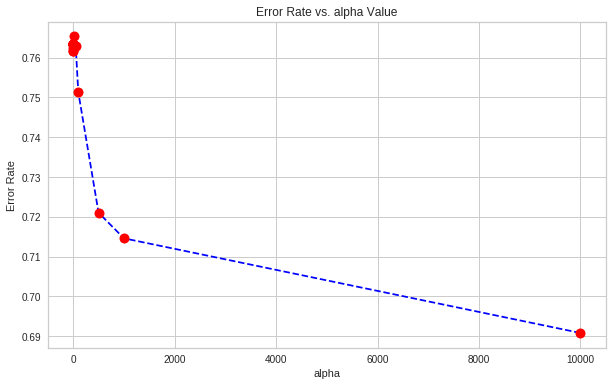

In [267]:
from sklearn.naive_bayes import MultinomialNB


alpha = 10000,1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001,0.00001
optimal_alpha = find_optimal_k_multi(x_train ,y_train,alpha)

print(optimal_alpha)

Accuracy on test set: 71.865%
Precision on test set: 0.680
Recall on test set: 0.872
F1-micro-Score on test set: 0.719


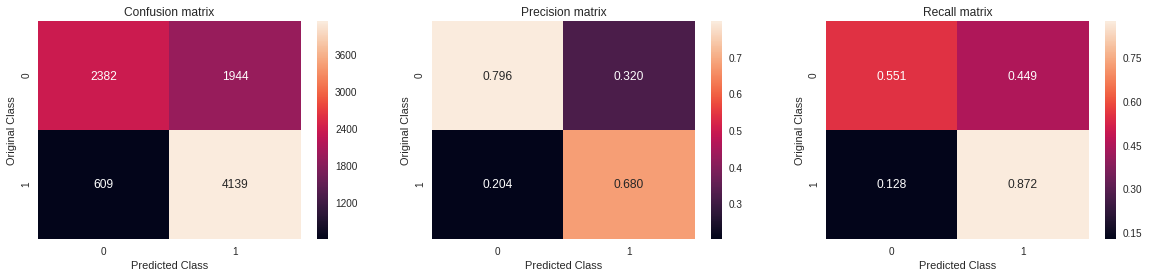

In [268]:
# instantiate learning model k = optimal_k
mn = MultinomialNB(alpha = optimal_alpha)
model = mn.fit(x_train, y_train)


# predict the response
pred = mn.predict(x_test)

print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, pred)))
print("Recall on test set: %0.3f"%(recall_score(y_test, pred)))
print("F1-micro-Score on test set: %0.3f"%(f1_score(y_test, pred,average='micro')))
plot_confusion_matrix(y_test, pred)

## The model for recall works well for Class 1 but poorly for Class 0 and very poor for precision of Class 1

# 4) RANDOM FOREST DECISION TREE

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 34)

In [0]:
#Bag of words with max_features=5000, min_df=20 and ngram=3
count_vect = CountVectorizer(max_features=5000, min_df=20,ngram_range=(1,3)) 
x_train = count_vect.fit_transform(x_train)
x_test = count_vect.transform(x_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 18.1min finished


Model with best parameters :
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=17, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Best Score: 76.71%
Best HyperParameter:  {'max_depth': 17, 'n_estimators': 400}


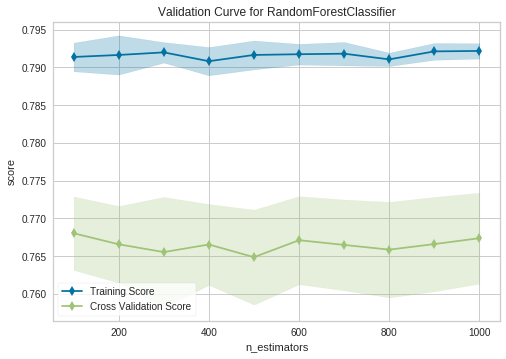

In [271]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from yellowbrick.model_selection import ValidationCurve

base_learners = [100,200,300,400,500,600,700,800,900,1000]
depth = (range(1,20,4))
param_grid={"n_estimators":base_learners,"max_depth":depth}
rf = RandomForestClassifier(max_features='sqrt')
gsv = GridSearchCV(rf, param_grid,scoring='precision',cv=5,n_jobs=-1,verbose=1)
gsv.fit(x_train, y_train)
cv_scores = gsv.cv_results_['mean_test_score']
print("Model with best parameters :\n",gsv.best_estimator_)
print("Best Score: %.2f%%"%(gsv.best_score_*100))
print("Best HyperParameter: ",gsv.best_params_)
optimal_n_estimators = gsv.best_estimator_.n_estimators
optimal_max_depth = gsv.best_estimator_.max_depth

#Validation Curve
viz = ValidationCurve(gsv.best_estimator_, param_name="n_estimators",param_range=base_learners, cv=10, scoring='precision')
viz.fit(x_train, y_train)
viz.poof()

The optimal value of n_estimators is :  400
The optimal value of max_depth is :  17
Accuracy on test set: 76.659%
Precision on test set: 0.757
Recall on test set: 0.815
F1-Score on test set: 0.785


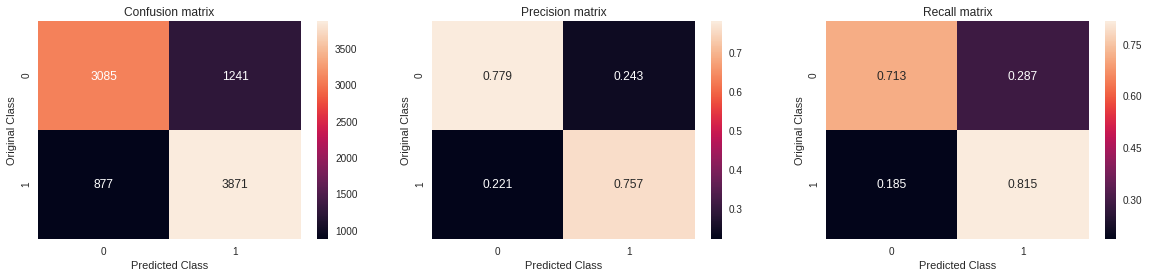

In [272]:
#Testing Accuracy on Test data
print("The optimal value of n_estimators is : ",optimal_n_estimators)
print("The optimal value of max_depth is : ",optimal_max_depth)
rf = RandomForestClassifier(n_estimators=optimal_n_estimators, max_depth=optimal_max_depth, max_features='sqrt')
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
y_prob = rf.predict_proba(x_test)


print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred)))
plot_confusion_matrix(y_test, y_pred)

### The model for recall works well for Class 1 but poorly for Class 0 and very poor for precision of Class 1

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 34)

In [274]:
# TF-IDF featurization using ngram=4, min_df=10
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(1,4), min_df=10)
x_train = tfidf.fit_transform(x_train)
#Normalize Data
x_train = preprocessing.normalize(x_train)
print("Train Data Size: ",x_train.shape)
x_test = tfidf.transform(x_test)
#Normalize Data
x_test = preprocessing.normalize(x_test)
print("Test Data Size: ",x_test.shape)

Train Data Size:  (36296, 7822)
Test Data Size:  (9074, 7822)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 19.1min finished


Model with best parameters :
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=17, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Best Score: 76.41%
Best HyperParameter:  {'max_depth': 17, 'n_estimators': 600}


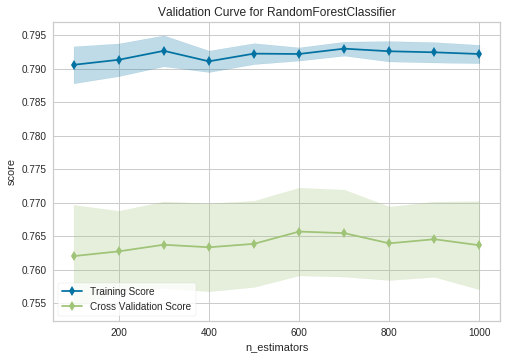

In [275]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from yellowbrick.model_selection import ValidationCurve

base_learners = [100,200,300,400,500,600,700,800,900,1000]
depth = (range(1,20,4))
param_grid={"n_estimators":base_learners,"max_depth":depth}
rf = RandomForestClassifier(max_features='sqrt')
gsv = GridSearchCV(rf, param_grid,scoring='precision',cv=5,n_jobs=-1,verbose=1)
gsv.fit(x_train, y_train)
cv_scores = gsv.cv_results_['mean_test_score']
print("Model with best parameters :\n",gsv.best_estimator_)
print("Best Score: %.2f%%"%(gsv.best_score_*100))
print("Best HyperParameter: ",gsv.best_params_)
optimal_n_estimators = gsv.best_estimator_.n_estimators
optimal_max_depth = gsv.best_estimator_.max_depth

#Validation Curve
viz = ValidationCurve(gsv.best_estimator_, param_name="n_estimators",param_range=base_learners, cv=10, scoring='precision')
viz.fit(x_train, y_train)
viz.poof()

The optimal value of n_estimators is :  600
The optimal value of max_depth is :  17
Accuracy on test set: 77.022%
Precision on test set: 0.756
Recall on test set: 0.829
F1-Score on test set: 0.791


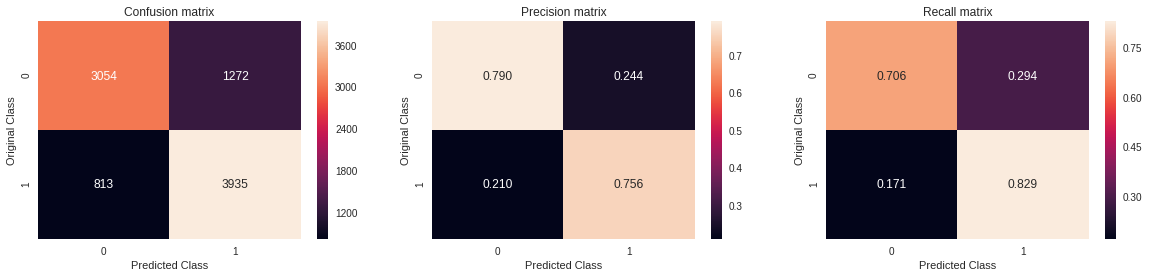

In [276]:
#Testing Accuracy on Test data
print("The optimal value of n_estimators is : ",optimal_n_estimators)
print("The optimal value of max_depth is : ",optimal_max_depth)
rf = RandomForestClassifier(n_estimators=optimal_n_estimators, max_depth=optimal_max_depth, max_features='sqrt')
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
y_prob = rf.predict_proba(x_test)


print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred)))
plot_confusion_matrix(y_test, y_pred)

###  The model for recall works well for Class 1 but poorly for Class 0 and very poor for precision of Class 1

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 34)

In [278]:
# TF-IDF featurization with ngram=1
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer() 
x_train = tfidf.fit_transform(x_train)
#Normalize Data
x_train = preprocessing.normalize(x_train)
print("Train Data Size: ",x_train.shape)
x_test = tfidf.transform(x_test)
#Normalize Data
x_test = preprocessing.normalize(x_test)
print("Test Data Size: ",x_test.shape)

Train Data Size:  (36296, 23589)
Test Data Size:  (9074, 23589)


Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed: 15.2min finished


Model with best parameters :
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=17, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Best Score: 74.85%
Best HyperParameter:  {'max_depth': 17, 'n_estimators': 400}


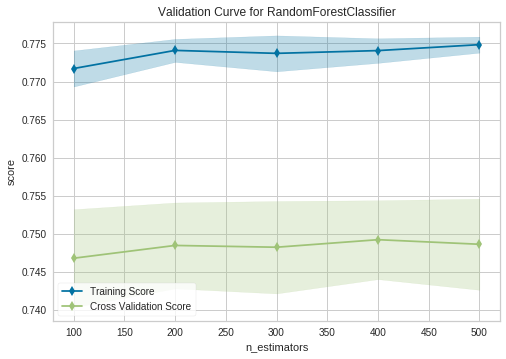

In [279]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from yellowbrick.model_selection import ValidationCurve

base_learners = [100,200,300,400,500]
depth = (range(1,20,4))
param_grid={"n_estimators":base_learners,"max_depth":depth}
rf = RandomForestClassifier(max_features='sqrt')
gsv = GridSearchCV(rf, param_grid,scoring='precision',cv=5,n_jobs=-1,verbose=1)
gsv.fit(x_train, y_train)
cv_scores = gsv.cv_results_['mean_test_score']
print("Model with best parameters :\n",gsv.best_estimator_)
print("Best Score: %.2f%%"%(gsv.best_score_*100))
print("Best HyperParameter: ",gsv.best_params_)
optimal_n_estimators = gsv.best_estimator_.n_estimators
optimal_max_depth = gsv.best_estimator_.max_depth

#Validation Curve
viz = ValidationCurve(gsv.best_estimator_, param_name="n_estimators",param_range=base_learners, cv=10, scoring='precision')
viz.fit(x_train, y_train)
viz.poof()

The optimal value of n_estimators is :  400
The optimal value of max_depth is :  17
Accuracy on test set: 76.945%
Precision on test set: 0.737
Recall on test set: 0.869
F1-Score on test set: 0.798


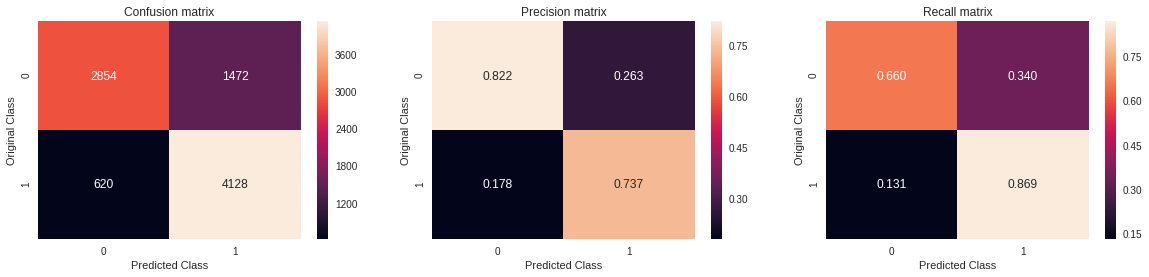

In [280]:
#Testing Accuracy on Test data
print("The optimal value of n_estimators is : ",optimal_n_estimators)
print("The optimal value of max_depth is : ",optimal_max_depth)
rf = RandomForestClassifier(n_estimators=optimal_n_estimators, max_depth=optimal_max_depth, max_features='sqrt')
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
y_prob = rf.predict_proba(x_test)


print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred)))
plot_confusion_matrix(y_test, y_pred)

### The model for recall works well for Class 1 but poorly for Class 0 and very poor for precision of Class 1

In [58]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 34)

In [61]:
#Bag of words with max_features=5000, min_df=20 and ngram=3
count_vect = CountVectorizer(max_features=5000, min_df=5,ngram_range=(1,3)) 
x_train = count_vect.fit_transform(x_train)
x_test = count_vect.transform(x_test)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 31.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 106.6min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 200.0min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 281.0min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 373.2min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 500.9min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 635.7min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 775.0min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed: 778.8min finished


Model with best parameters :
 GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.3, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
Best HyperParameter:  {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 1000}
Best Accuracy: 80.70%


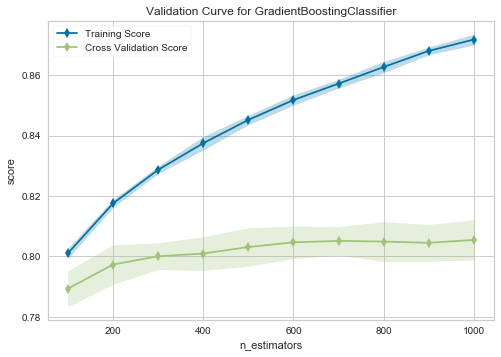

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from yellowbrick.model_selection import ValidationCurve

base_learners = [100,200,300,400,500,600,700,800,900,1000]
depth = (range(1,20,2))
Learning_rate = [0.01,0.05,0.1,0.2,0.3]

param_grid = {'n_estimators': base_learners, 'max_depth':depth, 'learning_rate':Learning_rate}
gb = GradientBoostingClassifier(max_features='sqrt')
gsv = GridSearchCV(gb, param_grid,scoring='precision',cv=10,n_jobs=-1,verbose=1)
gsv.fit(x_train, y_train)
cv_scores = gsv.cv_results_['mean_test_score']
print("Model with best parameters :\n",gsv.best_estimator_)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))
optimal_n_estimators = gsv.best_estimator_.n_estimators
optimal_max_depth = gsv.best_estimator_.max_depth
optimal_learning_rate = gsv.best_estimator_.learning_rate

#Validation Curve
viz = ValidationCurve(gsv.best_estimator_, param_name="n_estimators",param_range=base_learners, cv=10, scoring='precision')
viz.fit(x_train, y_train)
viz.poof()

The optimal value of n_estimators is :  1000
The optimal value of max_depth is :  3
Accuracy on test set: 79.359%
Precision on test set: 0.799
Recall on test set: 0.810
F1-Score on test set: 0.804


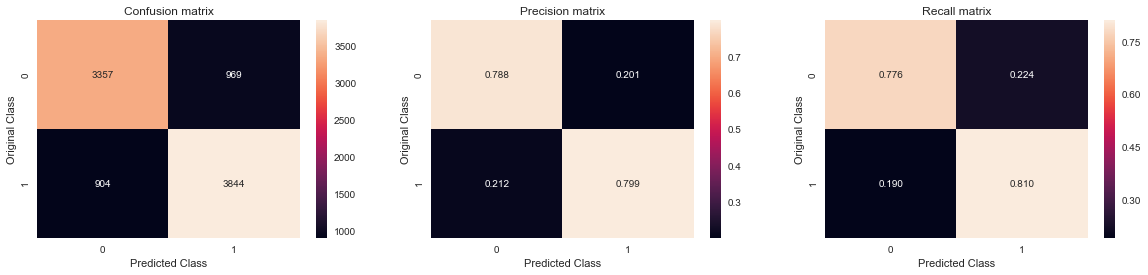

In [65]:
#Testing thew performance of model on Test data
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns


#Testing Accuracy on Test data
print("The optimal value of n_estimators is : ",optimal_n_estimators)
print("The optimal value of max_depth is : ",optimal_max_depth)

gb = GradientBoostingClassifier(n_estimators=optimal_n_estimators, max_depth=optimal_max_depth, learning_rate=optimal_learning_rate, max_features='sqrt')
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)
y_prob = gb.predict_proba(x_test)


print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred)))
plot_confusion_matrix(y_test, y_pred)

###  The model is bias towards Class 1 and is a dummy model.

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
import keras_metrics 
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [69]:
# load the dataset but only keep the top n words, zero the rest
X=training['CleanedText']
Y=training['Engage']

In [70]:

#Vocabulary
count_vect = CountVectorizer() 
count_vect.fit(X)

vocabulary = count_vect.get_feature_names()
print('Words in the Vocabulary : ',len(vocabulary))
print('Few feature names : ',vocabulary[150:170])


Words in the Vocabulary :  27418
Few feature names :  ['abudhabi', 'abueg', 'abuja', 'abund', 'abus', 'abut', 'abvdwgb', 'abwt', 'abysm', 'abz', 'aca', 'acacia', 'academ', 'academi', 'acadia', 'acail', 'acaruso', 'acattlerearerfromdaura', 'acc', 'accalertmychas']


In [71]:
#Create dictionary
corpus = dict()
ind = 0
for sent in X:
  for word in sent.split():
    corpus.setdefault(word,[])
    corpus[word].append(ind)
    ind += 1

#Frequency of each word in the vocabulary
freq = []
for w in vocabulary:
  freq.append(len(corpus[w]))

In [72]:
#frequency of words in their decreasing order
inc_index =np.argsort(np.array(freq))[::-1]

#giving ranks to each word in the vocabulary 
word_rank = dict()
rank = 1
for i in inc_index:
  word_rank[vocabulary[i]] = rank
  rank +=1

In [73]:
data = []
for sent in X:
  row = []
  for word in sent.split():
    if(len(word)>1):
      row.append(word_rank[word])
  data.append(row)

#Splitting the data 
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(data, Y, test_size=0.3, random_state=42)

In [74]:
#padding the input sequences
max_review_length = 100
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

print(X_train.shape)
print(X_train[1])

(32568, 100)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0   45   68  276   60  188
 2380    1]


In [75]:
from keras.models import Sequential
vocab_size = len(vocabulary)
embedding_vecor_length = 32
epochs = 25

model = Sequential()
model.add(Embedding(vocab_size+1, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(64,return_sequences=True, dropout=0.7, recurrent_dropout=0.7))
model.add(LSTM(32, dropout=0.7, recurrent_dropout=0.7))
model.add(Dense(1, activation='sigmoid'))

In [76]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',keras_metrics.precision(), keras_metrics.recall()])

#Fitting the data to the model
history = model.fit(X_train, Y_train, nb_epoch=25, batch_size=512 ,verbose=1,validation_data=(X_test, Y_test))

Train on 32568 samples, validate on 13959 samples
Epoch 1/25
32568/32568 [==============================] - 66s 2ms/step - loss: 0.6527 - acc: 0.6317 - precision: 0.6164 - recall: 0.7560 - val_loss: 0.5502 - val_acc: 0.7170 - val_precision: 0.7198 - val_recall: 0.7289
Epoch 2/25
32568/32568 [==============================] - 60s 2ms/step - loss: 0.5273 - acc: 0.7499 - precision: 0.7408 - recall: 0.7923 - val_loss: 0.4865 - val_acc: 0.7713 - val_precision: 0.7769 - val_recall: 0.7739
Epoch 3/25
32568/32568 [==============================] - 60s 2ms/step - loss: 0.4724 - acc: 0.7874 - precision: 0.7799 - recall: 0.8185 - val_loss: 0.4650 - val_acc: 0.7843 - val_precision: 0.7758 - val_recall: 0.8117
Epoch 4/25
32568/32568 [==============================] - 60s 2ms/step - loss: 0.4444 - acc: 0.8048 - precision: 0.7936 - recall: 0.8399 - val_loss: 0.4564 - val_acc: 0.7937 - val_precision: 0.7703 - val_recall: 0.8486
Epoch 5/25
32568/32568 [==============================] - 60s 2ms/step - l

In [77]:
history.history

{'val_loss': [0.5501550758873053,
  0.4865407341487668,
  0.46499655909905147,
  0.45640178303491746,
  0.45803814391128583,
  0.46194268899811436,
  0.4688808493670048,
  0.4665831346162215,
  0.48065302290678347,
  0.4847828755214585,
  0.48856037000084906,
  0.4914983308808887,
  0.5041371740604149,
  0.5203195153616486,
  0.5109051732007887,
  0.508698393092028,
  0.5154800928589505,
  0.525855660148179,
  0.5295691950413087,
  0.5279530253910097,
  0.5464926533733537,
  0.5455780631534793,
  0.5425906469516371,
  0.5514667872474258,
  0.5518553970203213],
 'val_acc': [0.7170284402106568,
  0.7713303244620342,
  0.7842968693306628,
  0.7936814955358767,
  0.7945411561578843,
  0.7935382189847344,
  0.7925352818115844,
  0.7904577690957738,
  0.7886668098580061,
  0.7897413854006667,
  0.7886668098580061,
  0.7865892969543165,
  0.7860161899854208,
  0.784225230747653,
  0.7838670391007885,
  0.7834372090844133,
  0.783222293587313,
  0.7837237623617671,
  0.7839386772824202,
  0.78

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic_val(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Accuracy")
    ax.plot(x, ty, 'r', label="Train Accuracy")
    plt.legend()
    plt.grid(True)
    fig.canvas.draw()
    
    

def plt_dynamic_pre(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Precision")
    ax.plot(x, ty, 'r', label="Train Precision")
    plt.legend()
    plt.grid(True)
    fig.canvas.draw()
    

def plt_dynamic_recall(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Recall")
    ax.plot(x, ty, 'r', label="Train Recall")
    plt.legend()
    plt.grid(True)
    fig.canvas.draw()

Test Accuracy: 0.7771330324543164
Test Precision: 0.7553828513090154
Test Recall: 0.832724719089428


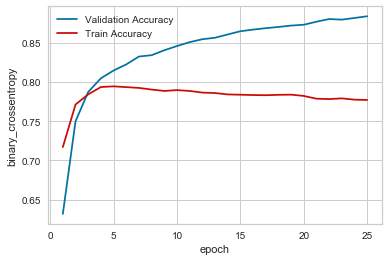

In [80]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test Accuracy:', score[1]) 
print('Test Precision:', score[2]) 
print('Test Recall:', score[3])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('binary_crossentropy')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['acc']
ty = history.history['val_acc']
plt_dynamic_val(x, vy, ty, ax)

In [81]:
score

[0.5518554015080698, 0.7771330324543164, 0.7553828513090154, 0.832724719089428]

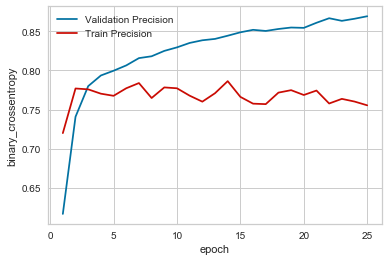

In [82]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('binary_crossentropy')

x = list(range(1,epochs+1))
vy = history.history['precision']
ty = history.history['val_precision']
plt_dynamic_pre(x, vy, ty, ax)



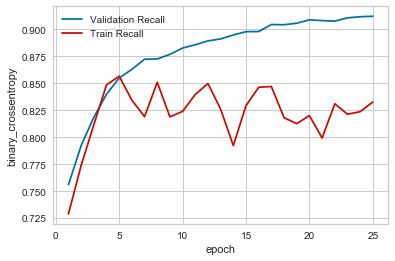

In [83]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('binary_crossentropy')


x = list(range(1,epochs+1))
vy = history.history['recall']
ty = history.history['val_recall']
plt_dynamic_recall(x, vy, ty, ax)



In [84]:
# load the dataset but only keep the top n words, zero the rest
X=training['CleanedText']
Y=training['Engage']

In [85]:
#Vocabulary
count_vect = CountVectorizer() 
count_vect.fit(X)

vocabulary = count_vect.get_feature_names()
print('Words in the Vocabulary : ',len(vocabulary))
print('Few feature names : ',vocabulary[150:170])

Words in the Vocabulary :  27418
Few feature names :  ['abudhabi', 'abueg', 'abuja', 'abund', 'abus', 'abut', 'abvdwgb', 'abwt', 'abysm', 'abz', 'aca', 'acacia', 'academ', 'academi', 'acadia', 'acail', 'acaruso', 'acattlerearerfromdaura', 'acc', 'accalertmychas']


In [86]:
#Create dictionary
corpus = dict()
ind = 0
for sent in X:
  for word in sent.split():
    corpus.setdefault(word,[])
    corpus[word].append(ind)
    ind += 1

#Frequency of each word in the vocabulary
freq = []
for w in vocabulary:
  freq.append(len(corpus[w]))

In [87]:
#frequency of words in their decreasing order
inc_index =np.argsort(np.array(freq))[::-1]

#giving ranks to each word in the vocabulary 
word_rank = dict()
rank = 1
for i in inc_index:
  word_rank[vocabulary[i]] = rank
  rank +=1

In [88]:
data = []
for sent in X:
  row = []
  for word in sent.split():
    if(len(word)>1):
      row.append(word_rank[word])
  data.append(row)

#Splitting the data 
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(data, Y, test_size=0.3, random_state=23)

In [89]:
#padding the input sequences
max_review_length = 100
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

print(X_train.shape)
print(X_train[1])

(32568, 100)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0  17  32  27 226 172]


In [90]:
vocab_size = len(vocabulary)
embedding_vecor_length = 32
epochs = 35

model = Sequential()
model.add(Embedding(vocab_size+1, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(64,return_sequences=True, dropout=0.4, recurrent_dropout=0.4))
model.add(LSTM(32,return_sequences=True, dropout=0.4, recurrent_dropout=0.4))
model.add(LSTM(16, dropout=0.5, recurrent_dropout=0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
opt = SGD(lr=0.07, momentum=0.8)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy",keras_metrics.precision(), keras_metrics.recall()])

#Fitting the data to the model
history = model.fit(X_train, Y_train, nb_epoch=25, batch_size=512 ,verbose=1,validation_data=(X_test, Y_test))

In [92]:
history.history

{'val_loss': [0.5228507899629138,
  0.4651885915450734,
  0.45699245403741934,
  0.4591904199860381,
  0.4757756481083376,
  0.47618558417248585,
  0.4887121833428005,
  0.49780368923423574,
  0.4951641369052992,
  0.4981940815122364,
  0.5114673992454924,
  0.5081516145097038,
  0.5250252828069228,
  0.546100303657725,
  0.5470799310978184,
  0.5433586818012691,
  0.5634798585868973,
  0.5748860052487802,
  0.5828914282332007,
  0.582469492110971,
  0.5971826911570393,
  0.603776757120531,
  0.6165299006225438,
  0.6288276607741411,
  0.6369959766001045],
 'val_acc': [0.7455405114125587,
  0.787950426350778,
  0.7939680493896777,
  0.794111325752941,
  0.7926069201810951,
  0.7925352819994635,
  0.7893831937409923,
  0.7909592378702279,
  0.7902428537993627,
  0.7865892969543165,
  0.7885951716763745,
  0.7883802561792742,
  0.7878071494238775,
  0.7863027434762736,
  0.7837954005433987,
  0.7836521241929454,
  0.7804283975777734,
  0.7799985669593311,
  0.7810731426898708,
  0.779998

Test Accuracy: 0.7767032022372521
Test Precision: 0.765198065096546
Test Recall: 0.8158628380148333


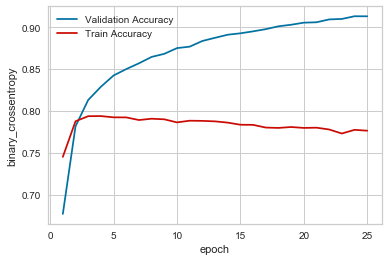

In [93]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test Accuracy:', score[1]) 
print('Test Precision:', score[2]) 
print('Test Recall:', score[3])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('binary_crossentropy')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['acc']
ty = history.history['val_acc']
plt_dynamic_val(x, vy, ty, ax)

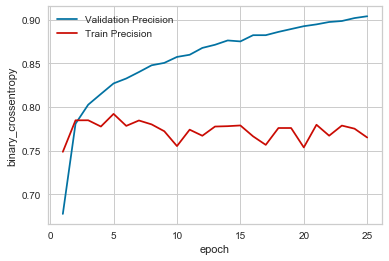

In [94]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('binary_crossentropy')

x = list(range(1,epochs+1))
vy = history.history['precision']
ty = history.history['val_precision']
plt_dynamic_pre(x, vy, ty, ax)

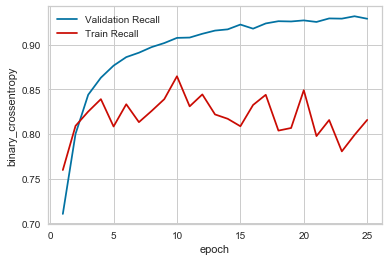

In [95]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('binary_crossentropy')


x = list(range(1,epochs+1))
vy = history.history['recall']
ty = history.history['val_recall']
plt_dynamic_recall(x, vy, ty, ax)

In [97]:
# load the dataset but only keep the top n words, zero the rest
X=training['CleanedText']
Y=training['Engage']

In [98]:
#Vocabulary
count_vect = CountVectorizer() 
count_vect.fit(X)

vocabulary = count_vect.get_feature_names()
print('Words in the Vocabulary : ',len(vocabulary))
print('Few feature names : ',vocabulary[150:170])

Words in the Vocabulary :  27418
Few feature names :  ['abudhabi', 'abueg', 'abuja', 'abund', 'abus', 'abut', 'abvdwgb', 'abwt', 'abysm', 'abz', 'aca', 'acacia', 'academ', 'academi', 'acadia', 'acail', 'acaruso', 'acattlerearerfromdaura', 'acc', 'accalertmychas']


In [99]:
#Create dictionary
corpus = dict()
ind = 0
for sent in X:
  for word in sent.split():
    corpus.setdefault(word,[])
    corpus[word].append(ind)
    ind += 1

#Frequency of each word in the vocabulary
freq = []
for w in vocabulary:
  freq.append(len(corpus[w]))

In [100]:
#frequency of words in their decreasing order
inc_index =np.argsort(np.array(freq))[::-1]

#giving ranks to each word in the vocabulary 
word_rank = dict()
rank = 1
for i in inc_index:
  word_rank[vocabulary[i]] = rank
  rank +=1

In [102]:
data = []
for sent in X:
  row = []
  for word in sent.split():
    if(len(word)>1):
      row.append(word_rank[word])
  data.append(row)

#Splitting the data 
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(data, Y, test_size=0.2, random_state=42)

In [103]:
#padding the input sequences
max_review_length = 100
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

print(X_train.shape)
print(X_train[1])

(37221, 100)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0  24   7  47  30  59  20
  20   1  31  24  47  59  20 910 625  17]


In [104]:
from keras.models import Sequential
vocab_size = len(vocabulary)
embedding_vecor_length = 32
epochs = 25

model = Sequential()
model.add(Embedding(vocab_size+1, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(64,return_sequences=True, dropout=0.7, recurrent_dropout=0.7))
model.add(LSTM(128,return_sequences=True, dropout=0.7, recurrent_dropout=0.7))
model.add(LSTM(96,return_sequences=True, dropout=0.7, recurrent_dropout=0.7))
model.add(LSTM(32, dropout=0.7, recurrent_dropout=0.7))
model.add(Dense(1, activation='sigmoid'))

In [105]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',keras_metrics.precision(), keras_metrics.recall()])

#Fitting the data to the model
history = model.fit(X_train, Y_train, nb_epoch=25, batch_size=512 ,verbose=1,validation_data=(X_test, Y_test))

Train on 37221 samples, validate on 9306 samples
Epoch 1/25
37221/37221 [==============================] - 307s 8ms/step - loss: 0.6915 - acc: 0.5321 - precision: 0.5330 - recall: 0.7385 - val_loss: 0.6748 - val_acc: 0.7054 - val_precision: 0.7030 - val_recall: 0.7309
Epoch 2/25
37221/37221 [==============================] - 283s 8ms/step - loss: 0.5966 - acc: 0.6922 - precision: 0.6907 - recall: 0.7285 - val_loss: 0.4978 - val_acc: 0.7665 - val_precision: 0.7666 - val_recall: 0.7793
Epoch 3/25
37221/37221 [==============================] - 284s 8ms/step - loss: 0.4887 - acc: 0.7802 - precision: 0.7753 - recall: 0.8071 - val_loss: 0.4797 - val_acc: 0.7866 - val_precision: 0.7670 - val_recall: 0.8352
Epoch 4/25
37221/37221 [==============================] - 284s 8ms/step - loss: 0.4589 - acc: 0.7995 - precision: 0.7867 - recall: 0.8378 - val_loss: 0.4666 - val_acc: 0.7919 - val_precision: 0.7581 - val_recall: 0.8691
Epoch 5/25
37221/37221 [==============================] - 283s 8ms/step

Test Accuracy: 0.7902428541238811
Test Precision: 0.7810424632565699
Test Recall: 0.8179135932388216


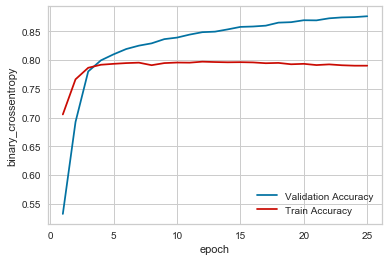

In [106]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test Accuracy:', score[1]) 
print('Test Precision:', score[2]) 
print('Test Recall:', score[3])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('binary_crossentropy')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['acc']
ty = history.history['val_acc']
plt_dynamic_val(x, vy, ty, ax)

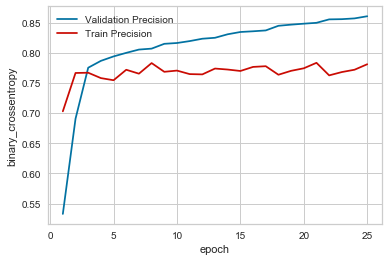

In [107]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('binary_crossentropy')

x = list(range(1,epochs+1))
vy = history.history['precision']
ty = history.history['val_precision']
plt_dynamic_pre(x, vy, ty, ax)

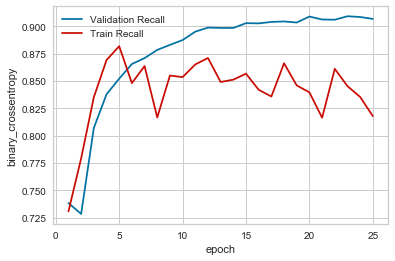

In [108]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('binary_crossentropy')


x = list(range(1,epochs+1))
vy = history.history['recall']
ty = history.history['val_recall']
plt_dynamic_recall(x, vy, ty, ax)

In [0]:
# load the dataset but only keep the top n words, zero the rest
X=train['CleanedText']
Y=train['Engage']

In [0]:
#Vocabulary
count_vect = CountVectorizer() 
count_vect.fit(X)

vocabulary = count_vect.get_feature_names()
print('Words in the Vocabulary : ',len(vocabulary))
print('Few feature names : ',vocabulary[150:170])

Words in the Vocabulary :  20120
Few feature names :  ['accounton', 'accountonlin', 'accountthank', 'accout', 'accoutn', 'accr', 'accra', 'accredit', 'accru', 'acct', 'accumul', 'accur', 'accuraci', 'accus', 'accustom', 'ace', 'acept', 'acer', 'ach', 'acharya']


In [0]:
#Create dictionary
corpus = dict()
ind = 0
for sent in X:
  for word in sent.split():
    corpus.setdefault(word,[])
    corpus[word].append(ind)
    ind += 1

#Frequency of each word in the vocabulary
freq = []
for w in vocabulary:
  freq.append(len(corpus[w]))

In [0]:
#frequency of words in their decreasing order
inc_index =np.argsort(np.array(freq))[::-1]

#giving ranks to each word in the vocabulary 
word_rank = dict()
rank = 1
for i in inc_index:
  word_rank[vocabulary[i]] = rank
  rank +=1

In [0]:
data = []
for sent in X:
  row = []
  for word in sent.split():
    if(len(word)>1):
      row.append(word_rank[word])
  data.append(row)

#Splitting the data 
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(data, Y, test_size=0.3, random_state=23)

In [0]:
#padding the input sequences
max_review_length = 100
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

print(X_train.shape)
print(X_train[1])

(31178, 100)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0  182   11   22  502 4950   23  428  779
  670  285]


In [0]:
vocab_size = len(vocabulary)
embedding_vecor_length = 32

epochs = 25
model = Sequential()
model.add(Embedding(vocab_size+1, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(128,return_sequences=True, dropout=0.6, recurrent_dropout=0.6))
model.add(LSTM(64,return_sequences=True, dropout=0.7, recurrent_dropout=0.4))
model.add(LSTM(32,return_sequences=True, dropout=0.7, recurrent_dropout=0.4))
model.add(LSTM(20, dropout=0.5, recurrent_dropout=0.5))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',keras_metrics.precision(), keras_metrics.recall()])


#Fitting the data to the model
history = model.fit(X_train, Y_train, nb_epoch=25, batch_size=512 ,verbose=1,validation_data=(X_test, Y_test))

Train on 31178 samples, validate on 13363 samples
Epoch 1/25
31178/31178 [==============================] - 190s 6ms/step - loss: 0.6508 - acc: 0.6192 - precision: 0.6167 - recall: 0.7411 - val_loss: 0.5652 - val_acc: 0.7283 - val_precision: 0.7572 - val_recall: 0.7240
Epoch 2/25
31178/31178 [==============================] - 183s 6ms/step - loss: 0.5478 - acc: 0.7409 - precision: 0.7517 - recall: 0.7622 - val_loss: 0.4951 - val_acc: 0.7716 - val_precision: 0.7665 - val_recall: 0.8240
Epoch 3/25
31178/31178 [==============================] - 179s 6ms/step - loss: 0.4826 - acc: 0.7862 - precision: 0.7829 - recall: 0.8247 - val_loss: 0.4745 - val_acc: 0.7855 - val_precision: 0.7774 - val_recall: 0.8392
Epoch 4/25
31178/31178 [==============================] - 176s 6ms/step - loss: 0.4556 - acc: 0.8031 - precision: 0.7927 - recall: 0.8503 - val_loss: 0.4707 - val_acc: 0.7876 - val_precision: 0.7794 - val_recall: 0.8409
Epoch 5/25
31178/31178 [==============================] - 179s 6ms/ste

Test Accuracy: 0.7778941854686248
Test Precision: 0.7656408952089822
Test Recall: 0.8425692695096199


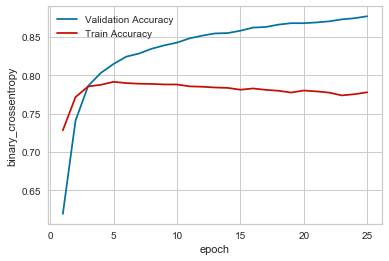

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test Accuracy:', score[1]) 
print('Test Precision:', score[2]) 
print('Test Recall:', score[3])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('binary_crossentropy')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['acc']
ty = history.history['val_acc']
plt_dynamic_val(x, vy, ty, ax)

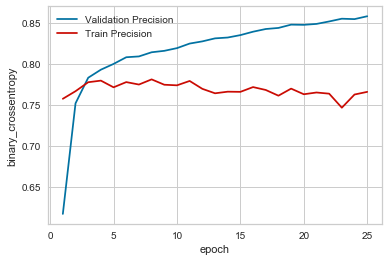

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('binary_crossentropy')

x = list(range(1,epochs+1))
vy = history.history['precision']
ty = history.history['val_precision']
plt_dynamic_pre(x, vy, ty, ax)

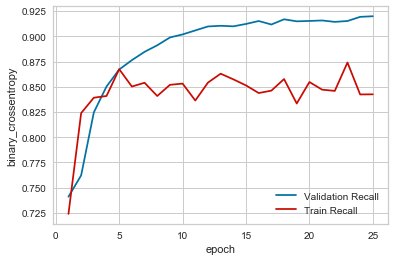

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('binary_crossentropy')


x = list(range(1,epochs+1))
vy = history.history['recall']
ty = history.history['val_recall']
plt_dynamic_recall(x, vy, ty, ax)

### LSTM with 2 hidden layer performs well and the precison score, Recall score and f1 score is very good when compared to Classical machine learning models.

### LSTM with 3 hidden layer performs slighly poor than previous LSTM model.

### LSTM with 4 hidden layer perfoms slighly better than 2 hidden layer LSTM and 3 hidden layer LSTM.

## 5. Performance Table

In [ ]:
from prettytable import PrettyTable    
x = PrettyTable()
 
x.field_names = ["Algorithm used","Additional information", "Test Accuracy","Precision","Recall",'F1 Score']
x.add_row(["Logistic Regression","BOW unigram", 79.67,78,85.1,79.7])
x.add_row(["Logistic Regression","BOW bigram", 79.67,78,85.1,79.7])
x.add_row(["Logistic Regression","BOW 4gram", 79.55,77.6,85.6,79.6])
x.add_row(["Logistic Regression","TF-IDF 4gram", 79.35,77.9,84.5,79.4])
x.add_row(["Decision Tree","BOW unigram", 56.02,74,24.6,37])
x.add_row(["Decision Tree","BOW trigram", 56.02,74,24.6,37])
x.add_row(["Decision Tree","TF-IDF 4gram", 74.48,73.4,80.3,76.7])
x.add_row(["Naive Bayes","BOW unigram", 71.73,65.8,95.8,71.7])
x.add_row(["Naive Bayes","BOW trigram", 71.86,68,87.2,71.9])
x.add_row(["Random Forest","BOW trigram", 77.02,75.6,82.9,79.1])
x.add_row(["Random Forest","TF-IDF 4gram", 76.94,73.7,86.9,78.8])
x.add_row(["Random Forest","TF-IDF unigram", 79.35,79.9,81,80.4])
x.add_row(["LSTM","2 hidden Layers", 77.71,75.54,83.27,79.81])
x.add_row(["LSTM","3 hidden Layers",79.02,78.1,81.79,78.58])
x.add_row(["LSTM","4 hidden Layers",77.79,76.56,84.26,80.22])

print('\t\t\t\tPerformance Table')
print(x)

### ------------------------------------------------------------------------------------------------------------- 

##  CONCLUSION

#### 1) As precision, recall and F1-Score is the performance metric to consider. LSTM models out perform Classical machine learning model.

#### 2) The best perfroming model is the LSTM model with 3 hidden layer with an Accuracy of 77.79%, Precison of 76.56%, Recall score of 84.26% and F1-Score of 80.22%

#### 3) Performance metric of the LSTM model can be improved when we do hyper parameter tuning of the LSTM model, where we experiment with various parameters. 